# K-means 範例

- 範例目標：讓同學了解如何使用 sklearn 執行 k-means
- 範例重點：設定 模型估計參數 以及 資料建模 兩大區塊

(Optional) 若尚未安裝相關套件，執行下一行，然後 restart kernel

In [1]:
#!pip3 install --user sklearn
#!pip3 install --user --upgrade matplotlib

載入套件

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

%matplotlib inline

載入 toy example 資料集

In [3]:
toy = datasets.make_blobs(centers=3, n_features=4)
X = toy[0] #座標(特徵)
y = toy[1] #類別標籤

設定 模型 估計參數

In [4]:
estimators = [('k_means_8', KMeans(n_clusters=8)),
              ('k_means_3', KMeans(n_clusters=3)),
              ('k_means_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]
#n_init 初始隨機中心點尋找次數, 最終會使用最佳的隨機中心點

資料建模 並 視覺化 結果

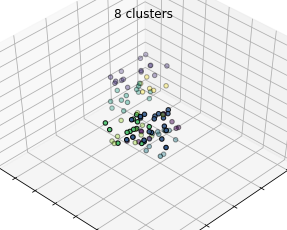

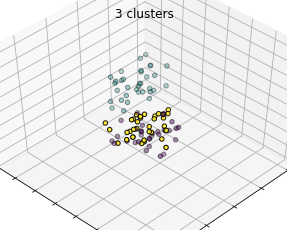

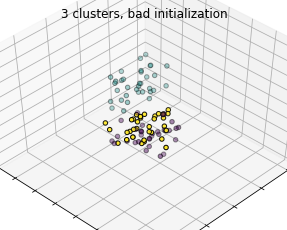

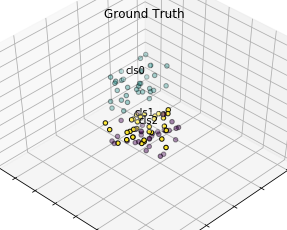

In [5]:
fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    
    #The (left, bottom, width, height) axes position. elev俯視角度 預設30. azim方位角視角 預設-60.
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134) 
    
    ## fit data
    est.fit(X)
    
    labels = est.labels_

    #x,y,z座標 c顏色 edgecolor圓圈框顏色
    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    #坐標軸數字不顯現
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    #視角距離
    ax.dist = 7
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('cls0', 0),
                    ('cls1', 1),
                    ('cls2', 2)]:
    
    #x,y,z座標 bbox用來對點的樣式設計 facecolor底色
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
    
# Reorder the labels to have colors matching the cluster results
#np.choose 前面參數是選擇的index 後面是選擇的內容 當y=0時 會變成1, y=1 -> 2, y=3 ->0 顏色調整
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 7

#fig.show()

# 作業

- 作業目標 : iris (dataset.load_iris()) 資料嘗試跑 kmeans (可以測試不同的群數 , init 等)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [7]:
display(set(y))
print("Target: ", iris.target_names)
print("Features: ", iris.feature_names)

{0, 1, 2}

Target:  ['setosa' 'versicolor' 'virginica']
Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
from sklearn.cluster import KMeans

estimators = [('k_means_2', KMeans(n_clusters=2)),
              ('k_means_3', KMeans(n_clusters=3)),
              ('k_means_4', KMeans(n_clusters=4)),
              ('k_means_6', KMeans(n_clusters=6)),
              ('k_means_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random', random_state=1)),
              ('k_means_multi_init', KMeans(n_clusters=3, n_init=50,
                                               init='random'))]

In [9]:
def get_auc(label_temp):
    
    percentage_all = []
    types = len(set(label_temp))
    for i in range(types):
        a,b = np.unique(label_temp[:50], return_counts=True)
        label_temp = label_temp[50:]
        
        correct_count = 50
        while len(a)!=1:
            correct_count = (correct_count - min(b))
            a = np.delete(a, list(b).index(min(b)))
        
        percentage_all.append(correct_count/sum(b))
        
    return percentage_all

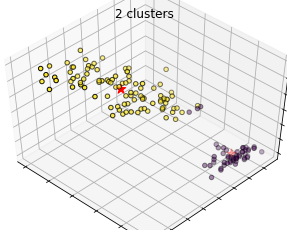

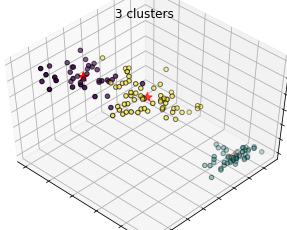

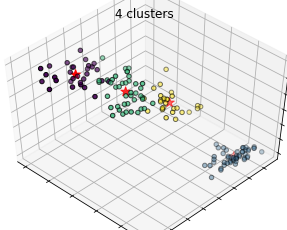

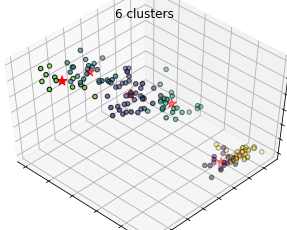

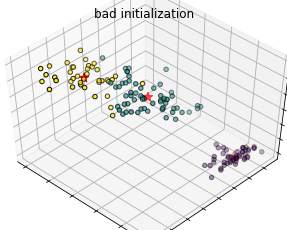

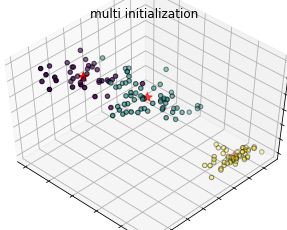

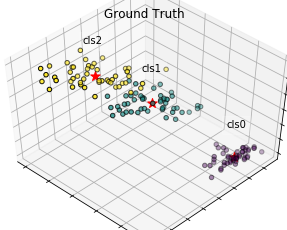

In [10]:
auc = {}
fignum = 1
titles = ['2 clusters', '3 clusters', '4 clusters', '6 clusters', 'bad initialization', 'multi initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    est
    #The (left, bottom, width, height) axes position. elev俯視角度 預設30. azim方位角視角 預設-60.
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134) 
    
    ## fit data
    est.fit(X)
    
    labels = est.labels_
    centroids = est.cluster_centers_
    
    
    if name=='k_means_3' or name=='k_means_bad_init' or name=='k_means_multi_init':
        auc[name] = get_auc(labels)
    #x,y,z座標 c顏色 edgecolor圓圈框顏色
    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.scatter(centroids[:, 3],
           centroids[:, 0],
           centroids[:, 2], c='red', s=100, marker='*')
    
    #坐標軸數字不顯現
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    #視角距離
    ax.dist = 8
    fignum = fignum + 1

    
# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('cls0', 0),
                    ('cls1', 1),
                    ('cls2', 2)]:
    
    #x,y,z座標 bbox用來對點的樣式設計 facecolor底色
    #y==label是找到對應的類別 後面的數字為其特徵
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
    
    ax.scatter(X[y == label, 3].mean(),
               X[y == label, 0].mean(),
               X[y == label, 2].mean(), c='red', s=100, marker='*')
    
# Reorder the labels to have colors matching the cluster results
#np.choose 前面參數是選擇的index 後面是選擇的內容 當y=0時 會變成1, y=1 -> 2, y=3 ->0 顏色調整
#y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')



ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 8

#fig.show()

In [11]:
auc

{'k_means_3': [1.0, 0.96, 0.72],
 'k_means_bad_init': [1.0, 0.94, 0.72],
 'k_means_multi_init': [1.0, 0.96, 0.72]}